In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
%matplotlib inline
df_csv = pd.read_csv('data/apib12tx.csv')

### Making all relevant data available

In [3]:
df_csv.columns

Index([u'CHARTER', u'SNAME', u'DNAME', u'CNAME', u'API12B', u'ST_RANK',
       u'PCT_AA', u'PCT_AI', u'PCT_AS', u'PCT_FI', u'PCT_HI', u'PCT_PI',
       u'PCT_WH', u'PCT_MR', u'MEALS', u'P_GATE', u'P_MIGED', u'P_EL',
       u'P_RFEP', u'P_DI', u'ACS_K3', u'ACS_46', u'ACS_CORE', u'PCT_RESP',
       u'NOT_HSG', u'HSG', u'SOME_COL', u'COL_GRAD', u'GRAD_SCH', u'AVG_ED'],
      dtype='object')

apib12tx.csv is composed mostly of percentage and average data. It is important to have the columns with counted data available, since counted data shows the actual variability of the data.

In [2]:
import pysal as ps
dbf_link = "data/apiB12db.dbf"
dbf = ps.open(dbf_link)
d = {col: dbf.by_col(col) for col in dbf.header}
df_whole = pd.DataFrame(d)
#pysal read the cells in the dbf as strings
df_whole = df_whole.convert_objects(convert_numeric=True)

### Looking at race and API

In [4]:
df_race_pct = df_csv[['API12B', 'PCT_HI', 'PCT_AS', 'PCT_AA',
                      'PCT_AI', 'PCT_FI', 'PCT_PI', 'PCT_WH']]
df_race_pct.corr()

,API12B,PCT_HI,PCT_AS,PCT_AA,PCT_AI,PCT_FI,PCT_PI,PCT_WH
API12B,1.000000,-0.418466,0.362361,-0.223117,-0.126489,0.153552,-0.060199,0.363066
PCT_HI,-0.418466,1.000000,-0.363255,-0.092423,-0.187081,-0.142512,-0.077148,-0.784308
PCT_AS,0.362361,-0.363255,1.000000,-0.049370,-0.088917,0.232352,0.071994,-0.077984
PCT_AA,-0.223117,-0.092423,-0.049370,1.000000,-0.067107,0.057254,0.219737,-0.282255
PCT_AI,-0.126489,-0.187081,-0.088917,-0.067107,1.000000,-0.080058,-0.029631,0.128484
PCT_FI,0.153552,-0.142512,0.232352,0.057254,-0.080058,1.000000,0.282081,-0.129342
PCT_PI,-0.060199,-0.077148,0.071994,0.219737,-0.029631,0.282081,1.000000,-0.116163
PCT_WH,0.363066,-0.784308,-0.077984,-0.282255,0.128484,-0.129342,-0.116163,1.000000


The strongest inverse correlation is between API and percentage of hispanic or latino students. The strongest direct correlations are between API and percentage of asian and white populations. Let's look at counts to see if these correlations hold.

In [5]:
df_race_counts = df_whole[['API12B', 'HI_NUM', 'AS_NUM',
                    'AA_NUM', 'AI_NUM', 'FI_NUM', 'PI_NUM', 'WH_NUM']]
df_race_counts.corr()

,API12B,HI_NUM,AS_NUM,AA_NUM,AI_NUM,FI_NUM,PI_NUM,WH_NUM
API12B,1.000000,-0.001706,0.010793,-0.001750,0.000065,0.004796,0.001394,0.008434
HI_NUM,-0.001706,1.000000,0.991973,0.998248,0.994364,0.996246,0.995046,0.993578
AS_NUM,0.010793,0.991973,1.000000,0.992514,0.994898,0.995468,0.996228,0.996129
AA_NUM,-0.001750,0.998248,0.992514,1.000000,0.994077,0.996525,0.996518,0.993413
AI_NUM,0.000065,0.994364,0.994898,0.994077,1.000000,0.995279,0.996435,0.997867
FI_NUM,0.004796,0.996246,0.995468,0.996525,0.995279,1.000000,0.997456,0.995827
PI_NUM,0.001394,0.995046,0.996228,0.996518,0.996435,0.997456,1.000000,0.997033
WH_NUM,0.008434,0.993578,0.996129,0.993413,0.997867,0.995827,0.997033,1.000000


When looking at counts all the correlations have less than a hundredth of the strength that they had when looking at percentages. The strongest correlation is between Asian students and API, but this is only about 0.010793.

Of course we are looking at notably different information here. This data doesn't tell us anything about proportions; it's not relational information. Percentages can give us some information about the diversity in schools, counts don't provide that information since they are not reported in relation to the total population of a school. We are cautioned to read percentages for what they say about diversity, not about specific populations.

###(In)significant effects

In [6]:
import statsmodels.formula.api as smf

In [9]:
lmh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 API12B   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sat, 01 Aug 2015   Prob (F-statistic):               0.00
Time:                        17:15:18   Log-Likelihood:                -60803.
No. Observations:               10187   AIC:                         1.216e+05
Df Residuals:                   10185   BIC:                         1.216e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    862.0822      1.858    463.873      0.000       858.439   865.725
PCT_HI        -1.4950      0.032    -46.499      0.000        -1.558    -1.432
==============================================================================
Omnibus:                     2856.146   Durbin-Watson:                   0.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7648.776
Skew:                          -1.507   Prob(JB):                         0.00
Kurtosis:                       5.990   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

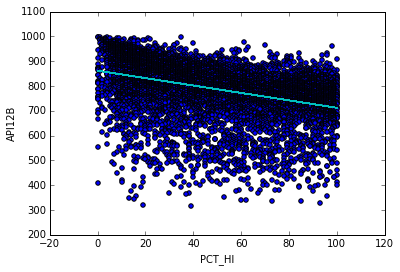

In [33]:
intercept, slope = lmh.params
df_csv.plot(kind='scatter',x='PCT_HI',y='API12B')
plt.plot((df_csv['PCT_HI']),slope*df_csv['PCT_HI']+intercept,'c')

In [40]:
lmh = smf.ols(formula='API12B~PCT_HI',data=df_csv).fit()

In [8]:
print lmh.params

Intercept    862.082185
PCT_HI        -1.495043
dtype: float64


The percentage of hispanic students explains 17% of the variability in API with a extremely small (statitically significant) p-value. However the coefficient is -1.49 meaning, for every percentage point the population of hispanic students increases, the API decreases almost one and a half points. A percentage point could mean 10 students or 1000 students: a point in the API score must be read in relation to the fact that this index goes from 200 to 1000. We conclude that the actual influence of the percentage of hispanic students is of little practical significance. Moreover, this information must be read in relation to waht is says in terms of diversity and possible lurking variables: A more homogeneously hispanic student population may correspond to a segregated neighborhood where educational resources are scarce.

In addition it is clear from the plot above that the data is very disperse. Predictions will be very inaccurate. This goes to show that with enough datapoints you can find statistically significant relation between any two variables.

In [21]:
#speaking of dispersion:
np.std(df_csv['API12B'])

104.17151674779215

In [22]:
lma = smf.ols(formula='API12B~PCT_AS',data=df_csv).fit()
lma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 API12B   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1539.
Date:                Sat, 01 Aug 2015   Prob (F-statistic):          1.05e-313
Time:                        17:33:56   Log-Likelihood:                -61067.
No. Observations:               10187   AIC:                         1.221e+05
Df Residuals:                   10185   BIC:                         1.222e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    765.5493      1.112    688.147      0.000       763.369   767.730
PCT_AS         3.0636      0.078     39.236      0.000         2.911     3.217
==============================================================================
Omnibus:                     1924.243   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3854.801
Skew:                          -1.136   Prob(JB):                         0.00
Kurtosis:                       4.980   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

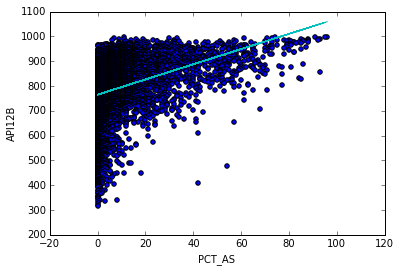

In [23]:
intercept, slope = lma.params
df_csv.plot(kind='scatter',x='PCT_AS',y='API12B')
plt.plot((df_csv['PCT_AS']),slope*df_csv['PCT_AS']+intercept,'c')

In [25]:
print lma.params

Intercept    765.549323
PCT_AS         3.063640
dtype: float64


The percentage of asian students explains 13% of the variability in API with a extremely small (statitically significant) p-value. However the coefficient is 3.06 meaning, for every percentage point the population of asian students increases, the API increases about 3 points. We've seen that API scores have a very large variability. However, in this model variability is particularly noticeable in schools where the percentage of asian students is between 0 and 20. Again, we suspect a great influence of lurking socio-economic variables in relation to the diversity of student population, yet the relation may be inverse to that of hispanic student populations. of course **this requires more research**.

### Checking outliers

In [27]:
hi_outl = df_csv[(df_csv['PCT_HI'] >= 80) & (df_csv['API12B'] >= 900)]
hi_outl.sort('API12B', ascending=False).head(5)

,CHARTER,SNAME,DNAME,CNAME,API12B,ST_RANK,PCT_AA,PCT_AI,PCT_AS,PCT_FI,...,ACS_K3,ACS_46,ACS_CORE,PCT_RESP,NOT_HSG,HSG,SOME_COL,COL_GRAD,GRAD_SCH,AVG_ED
161,D,KIPP Raices Academy,Los Angeles Unified,Los Angeles,961,10,2,0,0,0,...,NaN,NaN,NaN,93,14,36,35,8,7,2.59
510,D,Synergy Charter Academy,Los Angeles Unified,Los Angeles,935,10,4,0,0,0,...,NaN,NaN,NaN,77,40,28,24,7,1,2.03
542,Y,Sixth Street Prep,Victor Elementary,San Bernardino,933,10,8,1,1,0,...,22,34,NaN,92,36,23,20,9,13,2.38
683,D,KIPP Los Angeles College Preparatory,Los Angeles Unified,Los Angeles,925,10,1,0,2,0,...,NaN,NaN,NaN,99,28,37,27,4,4,2.20
702,D,Rocketship Mateo Sheedy Elementary,Santa Clara County Office of E,Santa Clara,924,10,1,0,1,0,...,24,25,NaN,91,45,24,14,11,7,2.10


In [46]:
print hi_outl[hi_outl['SNAME'] == 'KIPP Raices Academy']['API12B']
print hi_outl[hi_outl['SNAME'] == 'KIPP Raices Academy']['PCT_HI']

161    961
Name: API12B, dtype: int64
161    98
Name: PCT_HI, dtype: int64


Two of the schools in the top five are KIPP schools, and three are charters. In fact, the website for the school heading the list explains, " KIPP Raíces [Spanish for roots] is the first KIPP elementary school in California and the first charter elementary school in East Los Angeles." http://www.kippla.org/raices/ 

KIPP stands for "Knowledge is Power Program". "More than 87 percent of our students are from low-income families and eligible for the federal free or reduced-price meals program, and 96 percent are African American or Latino" http://www.kipp.org/about-kipp

In [47]:
as_outl = df_csv[(df_csv['PCT_AS'] >= 50) & (df_csv['API12B'] <= 500)]
as_outl.sort('API12B', ascending=False).head(5)

,CHARTER,SNAME,DNAME,CNAME,API12B,ST_RANK,PCT_AA,PCT_AI,PCT_AS,PCT_FI,...,ACS_K3,ACS_46,ACS_CORE,PCT_RESP,NOT_HSG,HSG,SOME_COL,COL_GRAD,GRAD_SCH,AVG_ED
10040,NaN,S.F. International High,San Francisco Unified,San Francisco,476,1,1,0,54,3,...,NaN,NaN,18,38,37,38,14,11,1,2.01


S.F. International High is a school for first generation immigrant students. It has a string focus on integration and support of cultural diversity. It uses its own measures of performance in relation to the very specific group of students it works with. KEY: students are not divided by their control of the English language.

"There are many things that make SF International a unique school. Our school is a close-knit, supportive community for students who may feel displaced after moving from another country and are unfamiliar with American language and culture. Differences among students are cherished and nurtured as they are continually encouraged to celebrate their cultural and linguistic individuality. We also believe that recent immigrants are capable of the highest levels of academic success when given the support they need." http://international-sfusd-ca.schoolloop.com/

###Pitches

We've identified schools that cater to two different minority populations. Their API performances must be interpreted in relation to their specific education models and the challenges that Latino and Asian populations face in the United States.

**Pitch 1**: KIPP schools with large latino populations have noticeably high API scores. What is it about the KIPP charter model that allows for such high performance?

**Pitch 2**: API scores for S.F. International High are noticeably low. Is API a good measure to evaluate first generation immigrant students. What are the specific challenges of these students and the schools that cater to them?